In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Datamining_project"

/content/drive/MyDrive/Datamining_project


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/Datamining_project/df_imputed.csv')

In [ ]:
dataset.shape

(11115, 10)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, learning_curve

In [6]:
X = dataset.drop(columns=['Potability'])  # Features
y = dataset['Potability']  # Target variable

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
194 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Decision Tree Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Metrics:
Accuracy: 0.9757
Precision: 0.9633
Recall: 0.9745
F1 Score: 0.9689
Log Loss: 0.8756


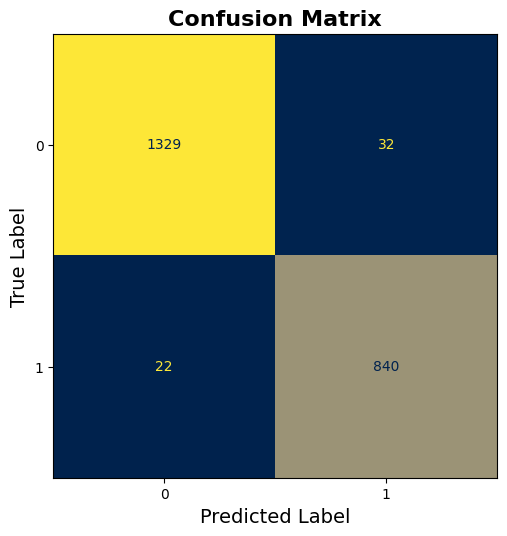

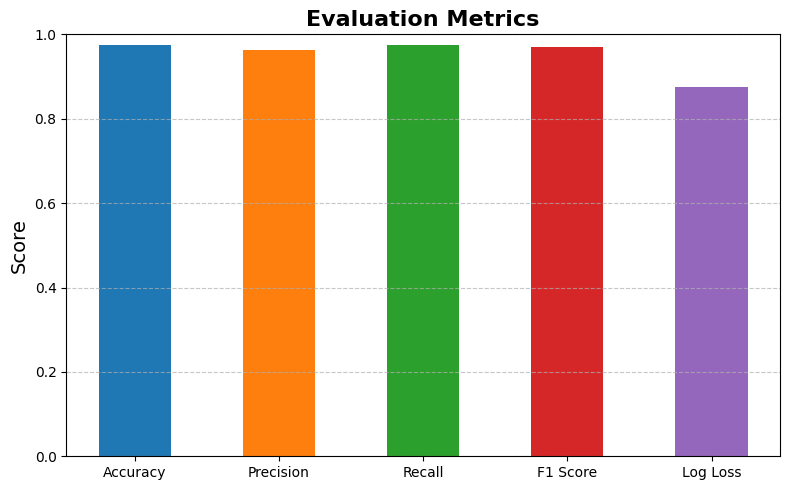

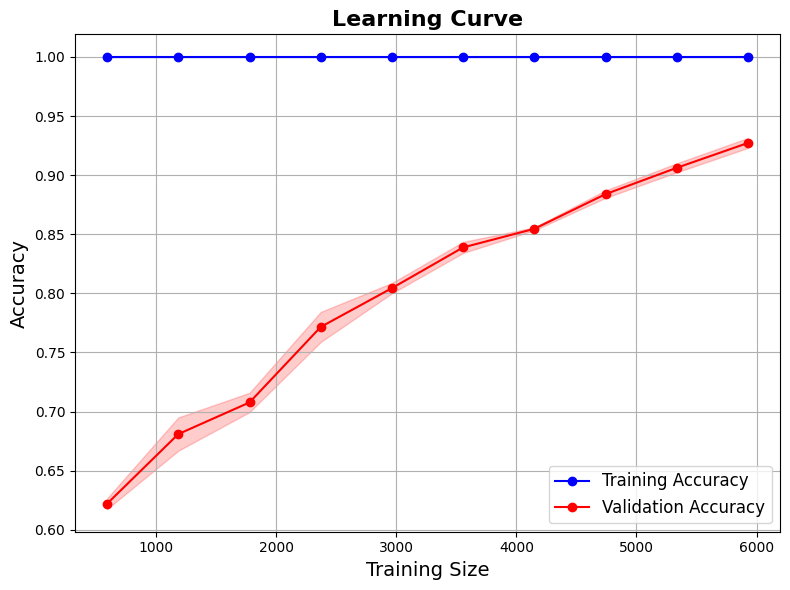

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data loaded as X and y

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional for Decision Tree, but can still help with consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for measuring the quality of splits
    'max_depth': [None, 5, 10, 15, 20],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2']  # The number of features to consider when looking for the best split
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Decision Tree Hyperparameters:", best_params)

# Make predictions using the best model
y_val_pred = best_model.predict(X_val_scaled)
y_val_proba = best_model.predict_proba(X_val_scaled) if hasattr(best_model, "predict_proba") else None

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba) if y_val_proba is not None else None

# Print the validation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}" if log_loss_val else "Log Loss: N/A")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_val))
disp.plot(cmap="cividis", colorbar=False, ax=ax)
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.tight_layout(pad=3.0)
plt.show()

# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val if log_loss_val is not None else 0  # Set Log Loss to 0 if None
}

# Bar Plot of Evaluation Metrics
fig, ax = plt.subplots(figsize=(8, 5))

# Bar properties
bar_width = 0.5  # Increase bar width slightly to reduce spacing
bar_positions = np.arange(len(metrics))  # Ensure bars are closely packed

# Create the bar plot
bars = ax.bar(bar_positions, metrics.values(), width=bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Update the x-axis ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

# Add titles and labels
ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)  # Adjust the range based on the metrics
ax.grid(axis="y", linestyle="--", alpha=0.7)

# No value labels on top of the bars now
# Removed the part where we add the text labels on top of bars

# Optimize layout
plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train/validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()






Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Decision Tree Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Metrics:
Accuracy: 0.9699
Precision: 0.9574
Recall: 0.9652
F1 Score: 0.9613
Log Loss: 0.1336


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


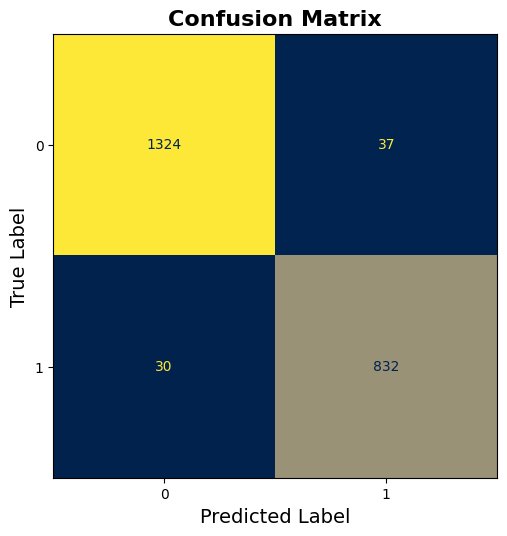

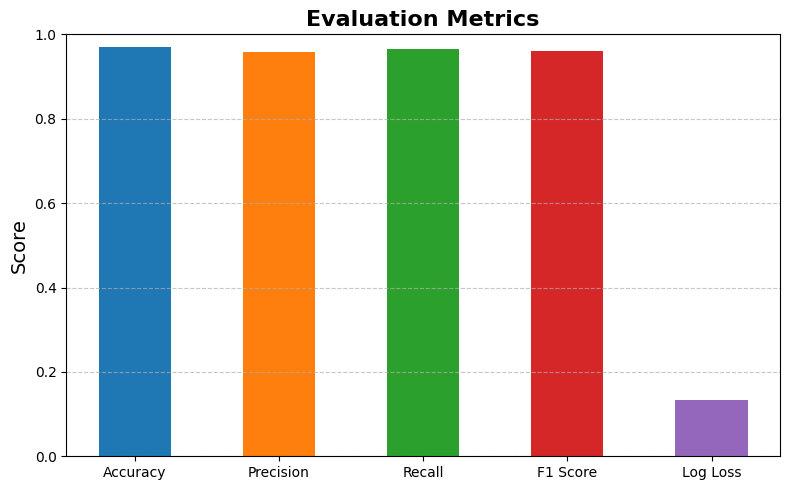

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py", line 343, in fit
    check_is_fitted(self.estimator, attributes=["classes_"])
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1757, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data loaded as X and y

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for GridSearch
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Decision Tree Hyperparameters:", best_params)

# Calibrate the model's probabilities to improve log loss
calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_val_scaled, y_val)  # Fit the calibration model on the validation set

# Make predictions using the best calibrated model
y_val_pred = calibrated_model.predict(X_val_scaled)
y_val_proba = calibrated_model.predict_proba(X_val_scaled)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba)

# Print the validation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_val))
disp.plot(cmap="cividis", colorbar=False, ax=ax)
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.tight_layout(pad=3.0)
plt.show()

# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val
}

# Bar Plot of Evaluation Metrics
fig, ax = plt.subplots(figsize=(8, 5))

# Bar properties
bar_width = 0.5  # Increase bar width slightly to reduce spacing
bar_positions = np.arange(len(metrics))  # Ensure bars are closely packed

# Create the bar plot
bars = ax.bar(bar_positions, metrics.values(), width=bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Update the x-axis ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

# Add titles and labels
ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)  # Adjust the range based on the metrics
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
train_sizes, train_scores, val_scores = learning_curve(
    calibrated_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train/validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Decision Tree Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Metrics:
Accuracy: 0.9699
Precision: 0.9574
Recall: 0.9652
F1 Score: 0.9613
Log Loss: 0.1336


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


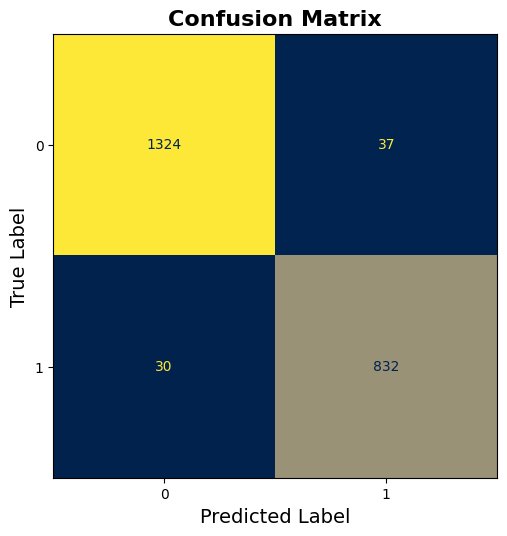

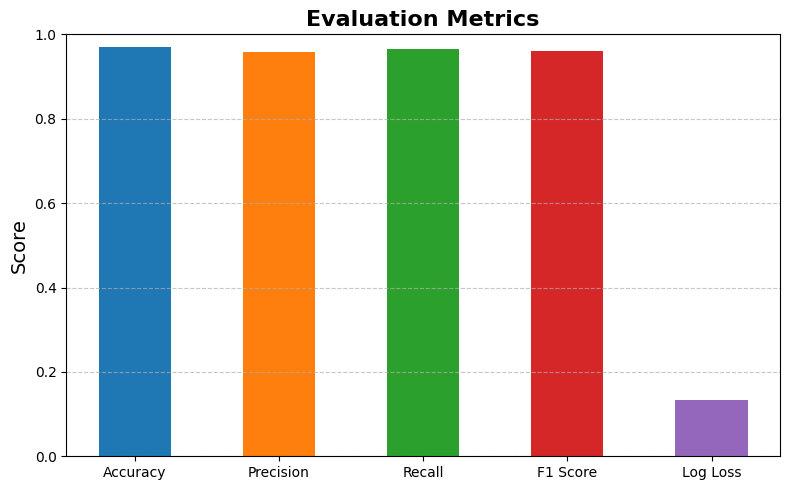

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py", line 343, in fit
    check_is_fitted(self.estimator, attributes=["classes_"])
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1757, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data loaded as X and y

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for GridSearch
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Decision Tree Hyperparameters:", best_params)

# Calibrate the model's probabilities to improve log loss
calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_val_scaled, y_val)  # Fit the calibration model on the validation set

# Make predictions using the best calibrated model
y_val_pred = calibrated_model.predict(X_val_scaled)
y_val_proba = calibrated_model.predict_proba(X_val_scaled)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba)

# Print the validation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_val))
disp.plot(cmap="cividis", colorbar=False, ax=ax)
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.tight_layout(pad=3.0)
plt.show()

# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val
}

# Bar Plot of Evaluation Metrics
fig, ax = plt.subplots(figsize=(8, 5))

# Bar properties
bar_width = 0.5  # Increase bar width slightly to reduce spacing
bar_positions = np.arange(len(metrics))  # Ensure bars are closely packed

# Create the bar plot
bars = ax.bar(bar_positions, metrics.values(), width=bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Update the x-axis ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

# Add titles and labels
ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)  # Adjust the range based on the metrics
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
train_sizes, train_scores, val_scores = learning_curve(
    calibrated_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train/validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Decision Tree Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Metrics:
Accuracy: 0.9762
Precision: 0.9742
Recall: 0.9640
F1 Score: 0.9691
Log Loss: 0.1066


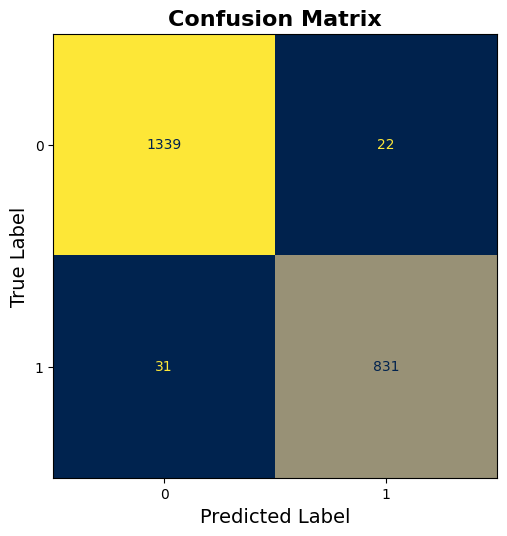

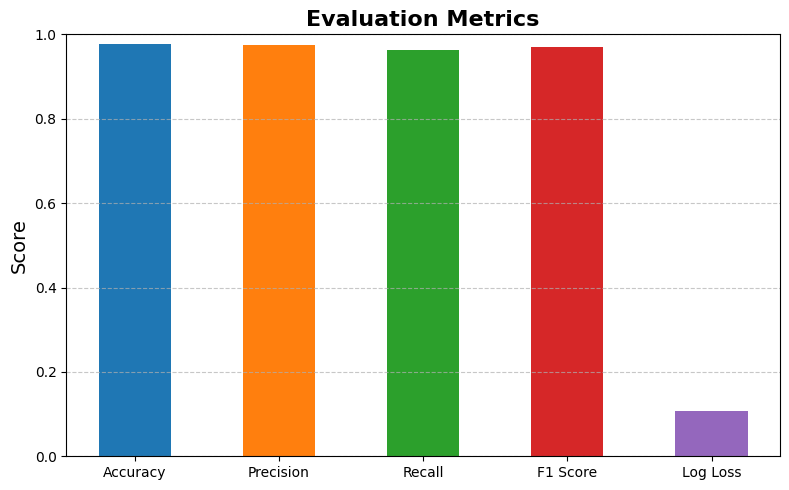

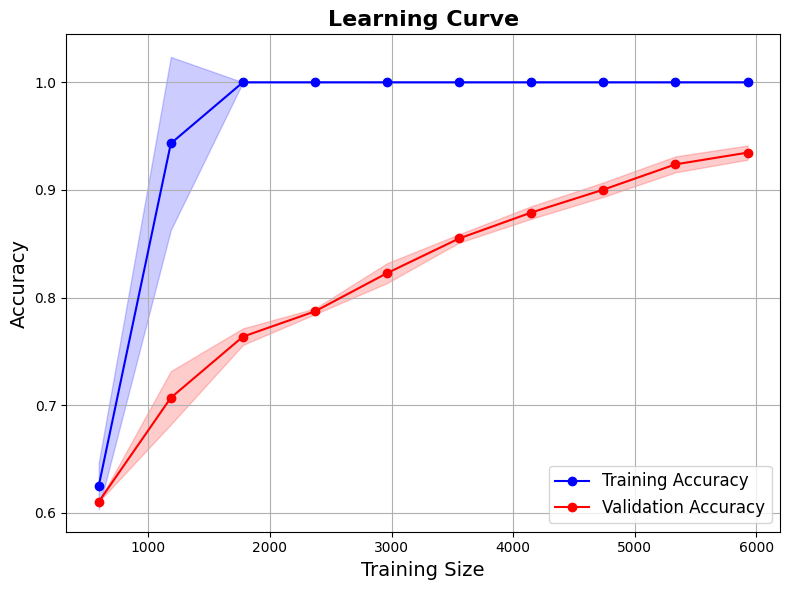

Model saved as 'calibrated_decision_tree_model.pkl'


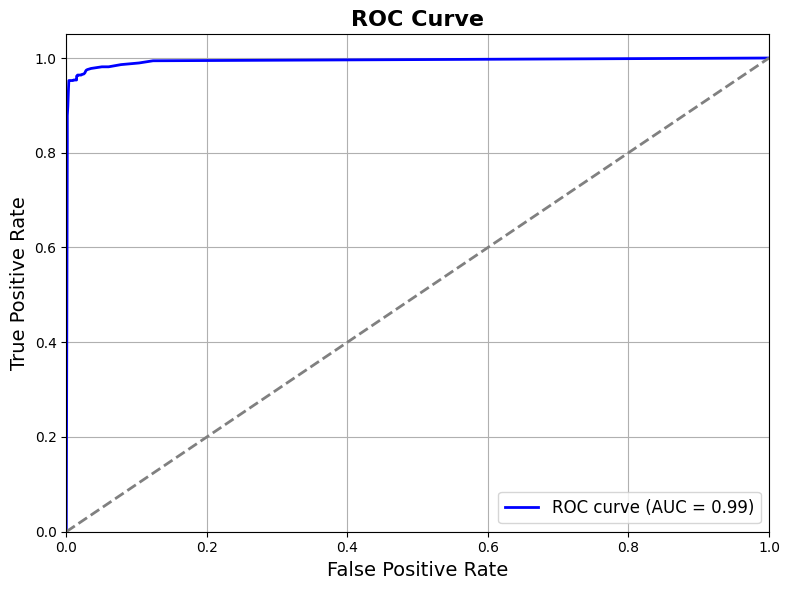

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import matplotlib.pyplot as plt
import joblib  # Import joblib to save the model

# Assuming you have your data loaded as X and y

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for GridSearch
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Decision Tree Hyperparameters:", best_params)

# Calibrate the model's probabilities to improve log loss
calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid')
calibrated_model.fit(X_train_scaled, y_train)  # Fit the calibration model on the training set

# Make predictions using the best calibrated model
y_val_pred = calibrated_model.predict(X_val_scaled)
y_val_proba = calibrated_model.predict_proba(X_val_scaled)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba)

# Print the validation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))

# Define class labels
class_labels = ['Non-Potable (0)', 'Potable (1)']

# Display the confusion matrix with annotations
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp.plot(cmap="cividis", colorbar=False, ax=ax)

# Add title and labels
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)



plt.tight_layout(pad=3.0)
plt.show()

# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val
}

# Bar Plot of Evaluation Metrics
fig, ax = plt.subplots(figsize=(8, 5))

# Bar properties
bar_width = 0.5  # Increase bar width slightly to reduce spacing
bar_positions = np.arange(len(metrics))  # Ensure bars are closely packed

# Create the bar plot
bars = ax.bar(bar_positions, metrics.values(), width=bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Update the x-axis ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

# Add titles and labels
ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)  # Adjust the range based on the metrics
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
train_sizes, train_scores, val_scores = learning_curve(
    calibrated_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train/validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the calibrated model using joblib
joblib.dump(calibrated_model, 'calibrated_decision_tree_model.pkl')
print("Model saved as 'calibrated_decision_tree_model.pkl'")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba[:, 1])  # Second column corresponds to class 1

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16, fontweight="bold")
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Decision Tree Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Metrics:
Accuracy: 0.9762
Precision: 0.9742
Recall: 0.9640
F1 Score: 0.9691
Log Loss: 0.1066


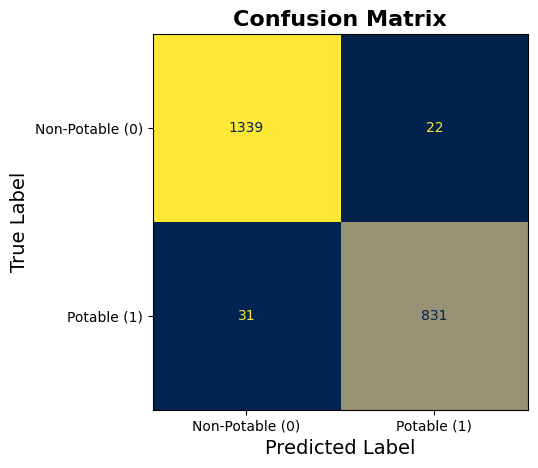

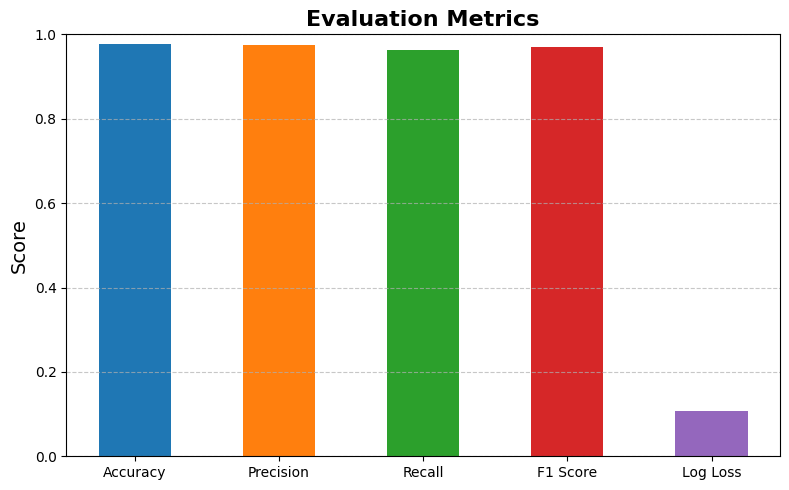

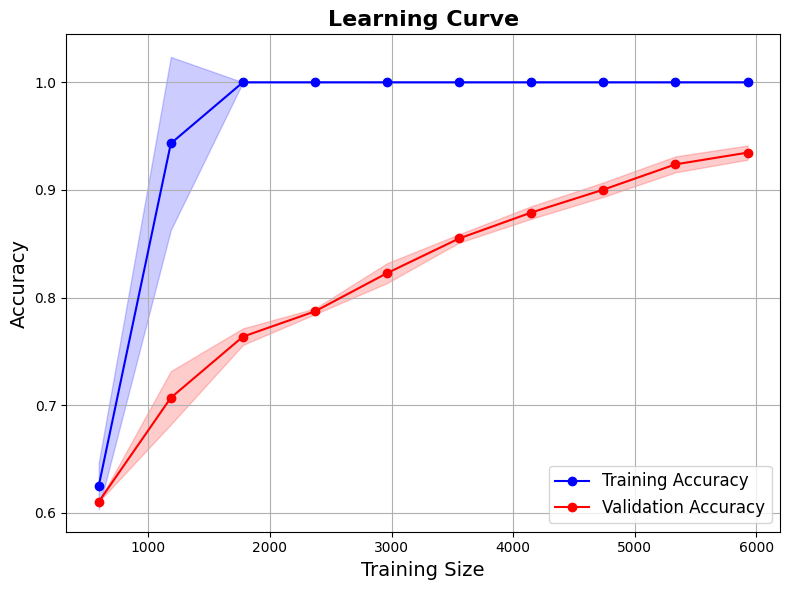

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data loaded as X and y

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for GridSearch
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Decision Tree Hyperparameters:", best_params)

# Calibrate the model's probabilities to improve log loss
calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid')
calibrated_model.fit(X_train_scaled, y_train)  # Fit the calibration model on the training set

# Make predictions using the best calibrated model
y_val_pred = calibrated_model.predict(X_val_scaled)
y_val_proba = calibrated_model.predict_proba(X_val_scaled)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba)

# Print the validation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))

# Define class labels
class_labels = ['Non-Potable (0)', 'Potable (1)']

# Display the confusion matrix with annotations
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp.plot(cmap="cividis", colorbar=False, ax=ax)

# Add title and labels
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)



plt.tight_layout(pad=3.0)
plt.show()

# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val
}

# Bar Plot of Evaluation Metrics
fig, ax = plt.subplots(figsize=(8, 5))

# Bar properties
bar_width = 0.5  # Increase bar width slightly to reduce spacing
bar_positions = np.arange(len(metrics))  # Ensure bars are closely packed

# Create the bar plot
bars = ax.bar(bar_positions, metrics.values(), width=bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Update the x-axis ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

# Add titles and labels
ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)  # Adjust the range based on the metrics
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
train_sizes, train_scores, val_scores = learning_curve(
    calibrated_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train/validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()